In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import mplcyberpunk

In [2]:
# Ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
Ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
averages = []
maxima = []
stddevs = []

for ni, N in enumerate(Ns):
    with open(f'test_1_results/N{N}.txt', 'r') as f:
        averages.append([])
        maxima.append([])
        stddevs.append([])
        for line in f:
            count, total, average, maximum, minimum, stddev = map(float, line.split())
            averages[ni].append(average)
            maxima[ni].append(maximum)
            stddevs[ni].append(stddev)

average = np.array([sum(p)/len(p) for p in averages])
maximum = np.array([sum(p)/len(p) for p in maxima])
stddev = np.array([np.sqrt(sum(map(lambda x:x*x, p))/len(p)) for p in stddevs])

all_averages = [[N, p] for (ni, N) in enumerate(Ns) for p in averages[ni]]
all_maxima = [[N, p] for (ni, N) in enumerate(Ns) for p in maxima[ni]]

all_averages = [list(p) for p in zip(*all_averages)]
all_maxima = [list(p) for p in zip(*all_maxima)]

Text(0.5, 1.0, 'Period between consecutive server broadcasts')

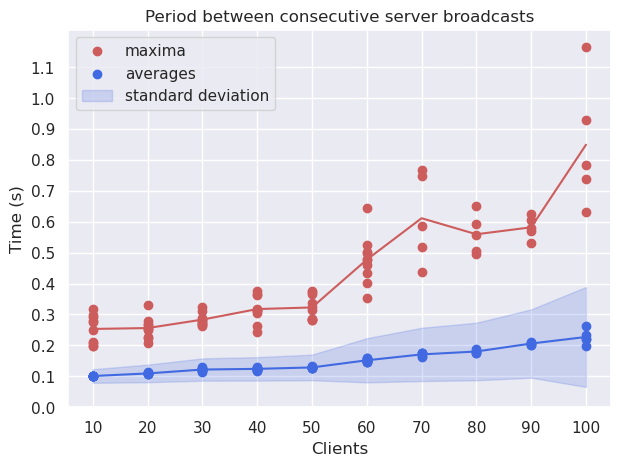

In [54]:
# plt.style.use("cyberpunk")
sns.set_theme()

# for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
#     plt.rcParams[param] = '#212946'  # bluish dark grey
# for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
#     plt.rcParams[param] = '1'  # very light grey

c1 = 'royalblue'
c2 = 'indianred'
# c1 = '#08F7FE'
# c2 = '#FE53BB'

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(x=all_maxima[0], y=all_maxima[1], color=c2, label='maxima')
ax.plot(Ns, maximum, color=c2)
ax.scatter(x=all_averages[0], y=all_averages[1], color=c1, label='averages')
ax.plot(Ns, average, color=c1)
ax.fill_between(Ns, average - stddev, average + stddev, color=c1, alpha=0.2)

handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color=c1, alpha=0.2, label='standard deviation')
handles.append(patch)
ax.legend(handles=handles)
ax.set_xticks(np.arange(10, 101, step=10))
ax.set_yticks(np.arange(0, 1.2, step=0.1))

ax.set_xlabel("Clients")
ax.set_ylabel("Time (s)")
ax.set_title('Period between consecutive server broadcasts')

In [25]:
prederrors = []
dirchanges = []

with open(f'test_2_results.txt', 'r') as f:
    for line in f:
        prederror, dirchange = map(float, line.split())
        prederrors.append(prederror)
        dirchanges.append(dirchange)

data = np.array([prederrors, dirchanges])
print('correlation coefficient:', np.corrcoef(data)[0,1])

prederrors = np.array(prederrors)

print('count:', len(prederrors))
print('total:', sum(prederrors))
print('mean:', np.mean(prederrors))
print('median:', np.median(prederrors))
print('max:', max(prederrors))
print('min:', min(prederrors))
print('stddev:', np.std(prederrors))

correlation coefficient: 0.889015897050335
count: 215578
total: 357259.23376886314
mean: 1.6572156424535895
median: 0.0
max: 148.17546468749993
min: 0.0
stddev: 5.824451204055662


Text(0.5, 1.0, 'Prediction Error, Bin Size = 10')

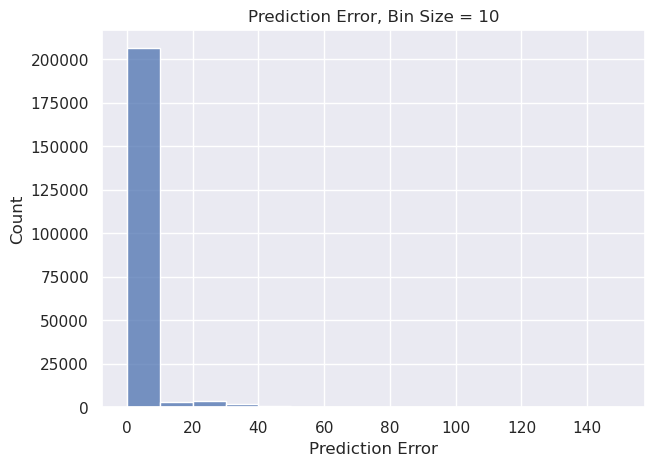

In [50]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
sns.set_theme()
sns.histplot(prederrors, binwidth=10, ax=ax)
ax.set_xlabel('Prediction Error')
ax.set_title('Prediction Error, Bin Size = 10')

/home/gabriel/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Prediction Error')]

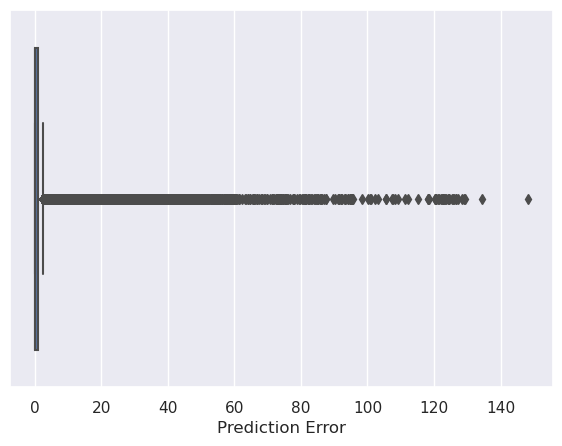

In [51]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
sns.set_theme()
sns.boxplot(prederrors, ax=ax).set(xlabel='Prediction Error')

[Text(0.5, 1.0, 'Prediction Error < 5, Bin Size = .1'),
 Text(0.5, 0, 'Prediction Error')]

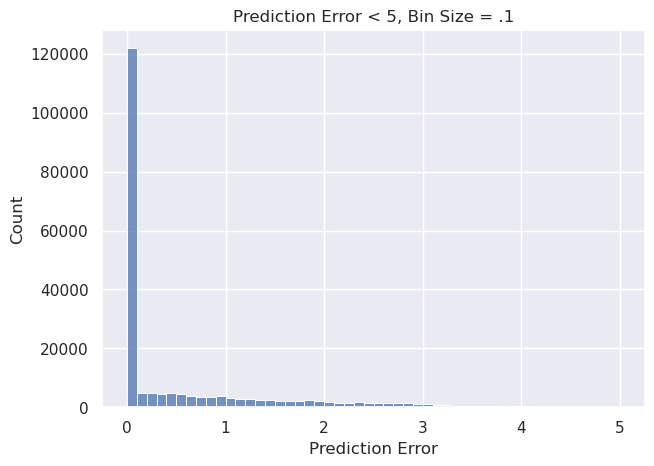

In [52]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
sns.set_theme()
sns.histplot(prederrors[prederrors < 5], binwidth=0.1, ax=ax).set(title='Prediction Error < 5, Bin Size = .1', xlabel='Prediction Error')